In [2]:
import os
import sys
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

repo_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(repo_root)

from src import *

In [3]:

process_directory(os.getcwd(), 'ex06.1')
process_directory(os.getcwd(), 'ex06.2')
process_directory(os.getcwd(), 'ex06.3')


FileNotFoundError: [Errno 2] No such file or directory: '/home/jackyeung99/senior_thesis/higher_order_ranking/exp/ex06/data/ex06.3'

In [28]:


def plot_results(df, title, ax):
    # Group by distribution and compute the mean of each model for the metric
    grouped = df.groupby('distribution').mean().reset_index().drop(columns=['rep'])
    re_indexed = grouped.set_index('distribution')
    
    # Plotting each model's metric
    re_indexed.plot(kind='bar', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Distribution')
    ax.set_ylabel('Mean Value')
    ax.legend(title='Model')

def visualize_results(base_path):
    # Read the summary CSV files
    log_likelihood_df = pd.read_csv(os.path.join(base_path, 'log_likelihood_summary.csv'))
    leadership_log_likelihood_df = pd.read_csv(os.path.join(base_path, 'leadership_log_likelihood_summary.csv'))
    rms_df = pd.read_csv(os.path.join(base_path, 'rms_summary.csv'))
    rho_df = pd.read_csv(os.path.join(base_path, 'rho_summary.csv'))
    tau_df = pd.read_csv(os.path.join(base_path, 'tau_summary.csv'))

    # List of dataframes and their titles
    dataframes = [
        (log_likelihood_df, 'Log Likelihood'),
        (leadership_log_likelihood_df, 'Leadership Log Likelihood'),
        (rms_df, 'RMS'),
        (rho_df, 'Rho'),
        (tau_df, 'Tau')
    ]

    fig, axes = plt.subplots(3, 2, figsize=(15, 15))  # Adjust the grid size based on the number of metrics
    axes = axes.flatten()
    
    for i, (df, title) in enumerate(dataframes):
        plot_results(df, title, axes[i])

    # Hide any unused subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

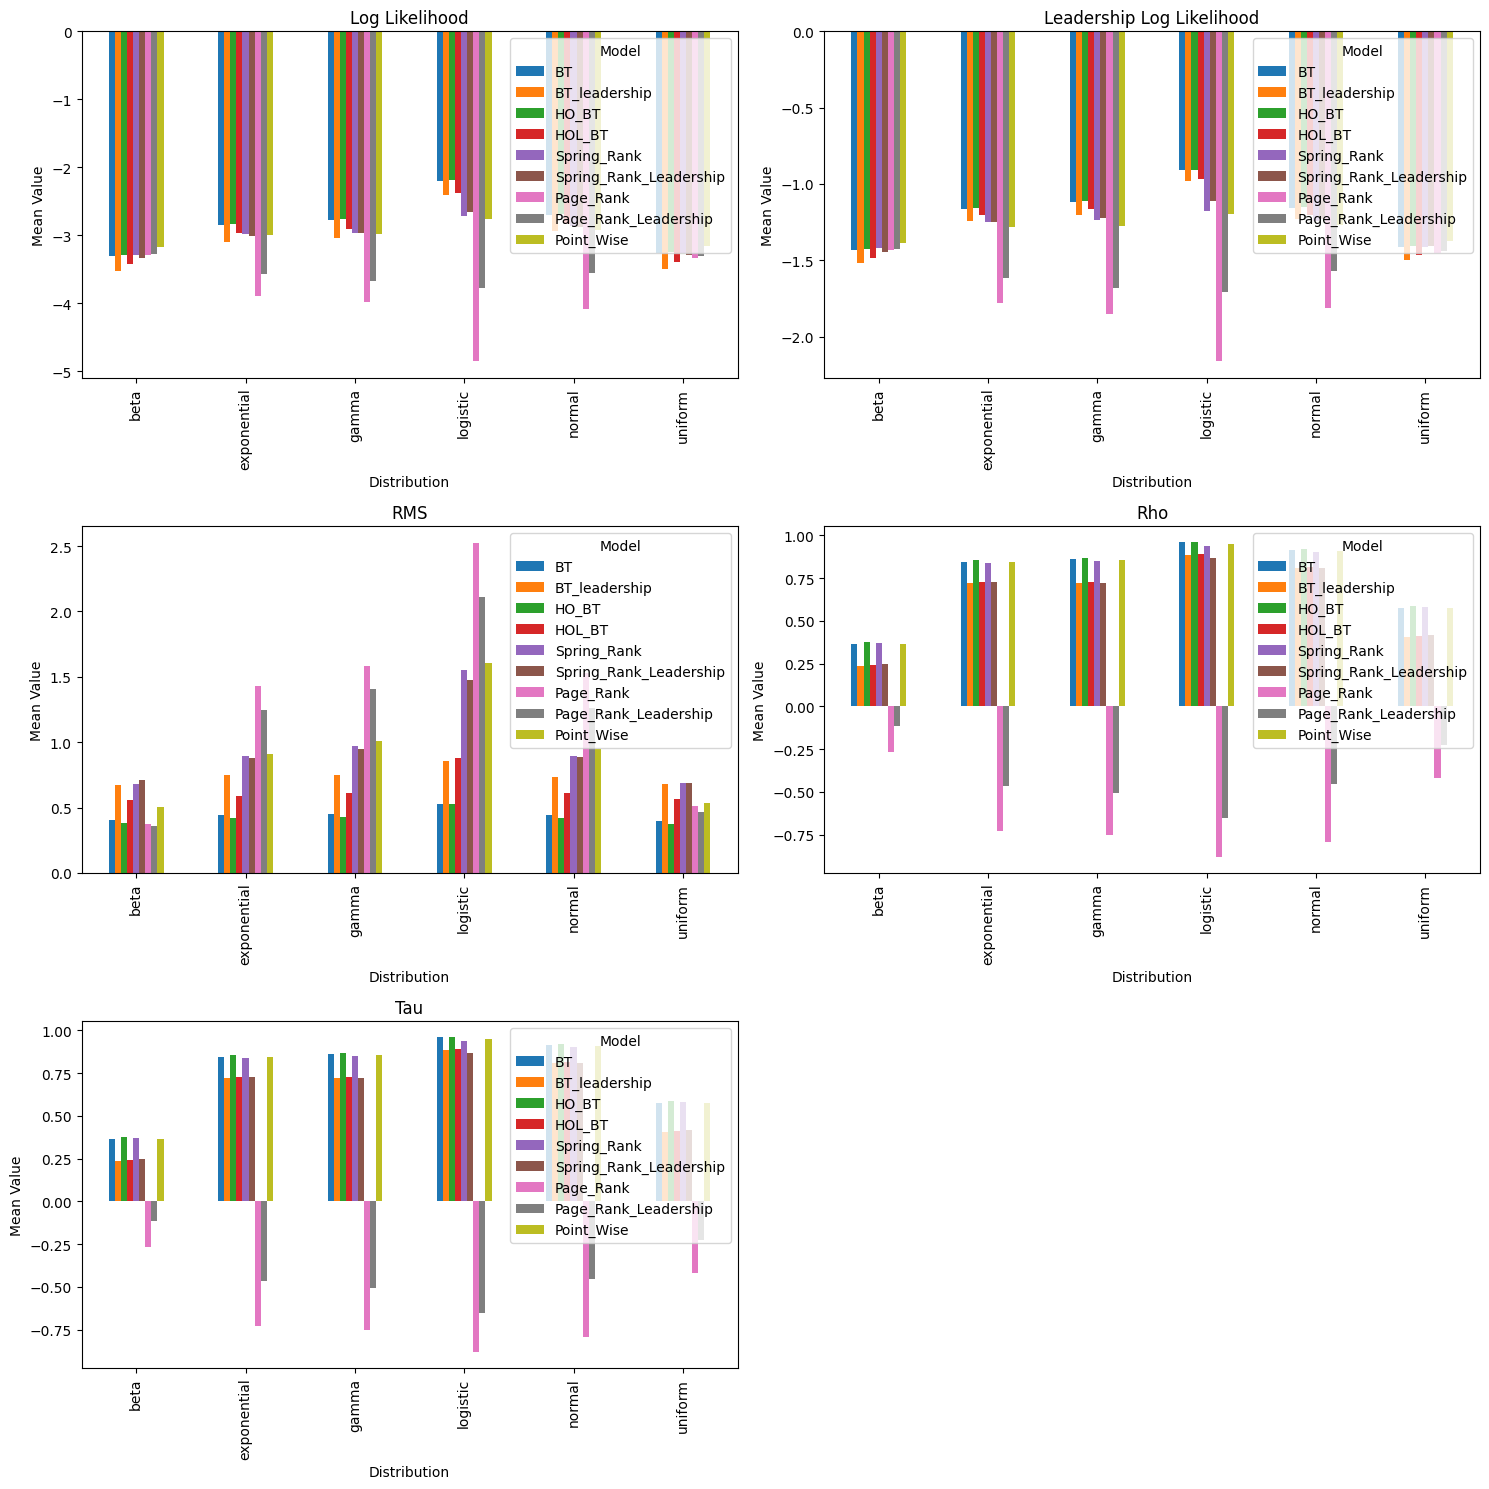

In [30]:
visualize_results(os.path.join(os.getcwd(), 'results', 'ex06.1'))

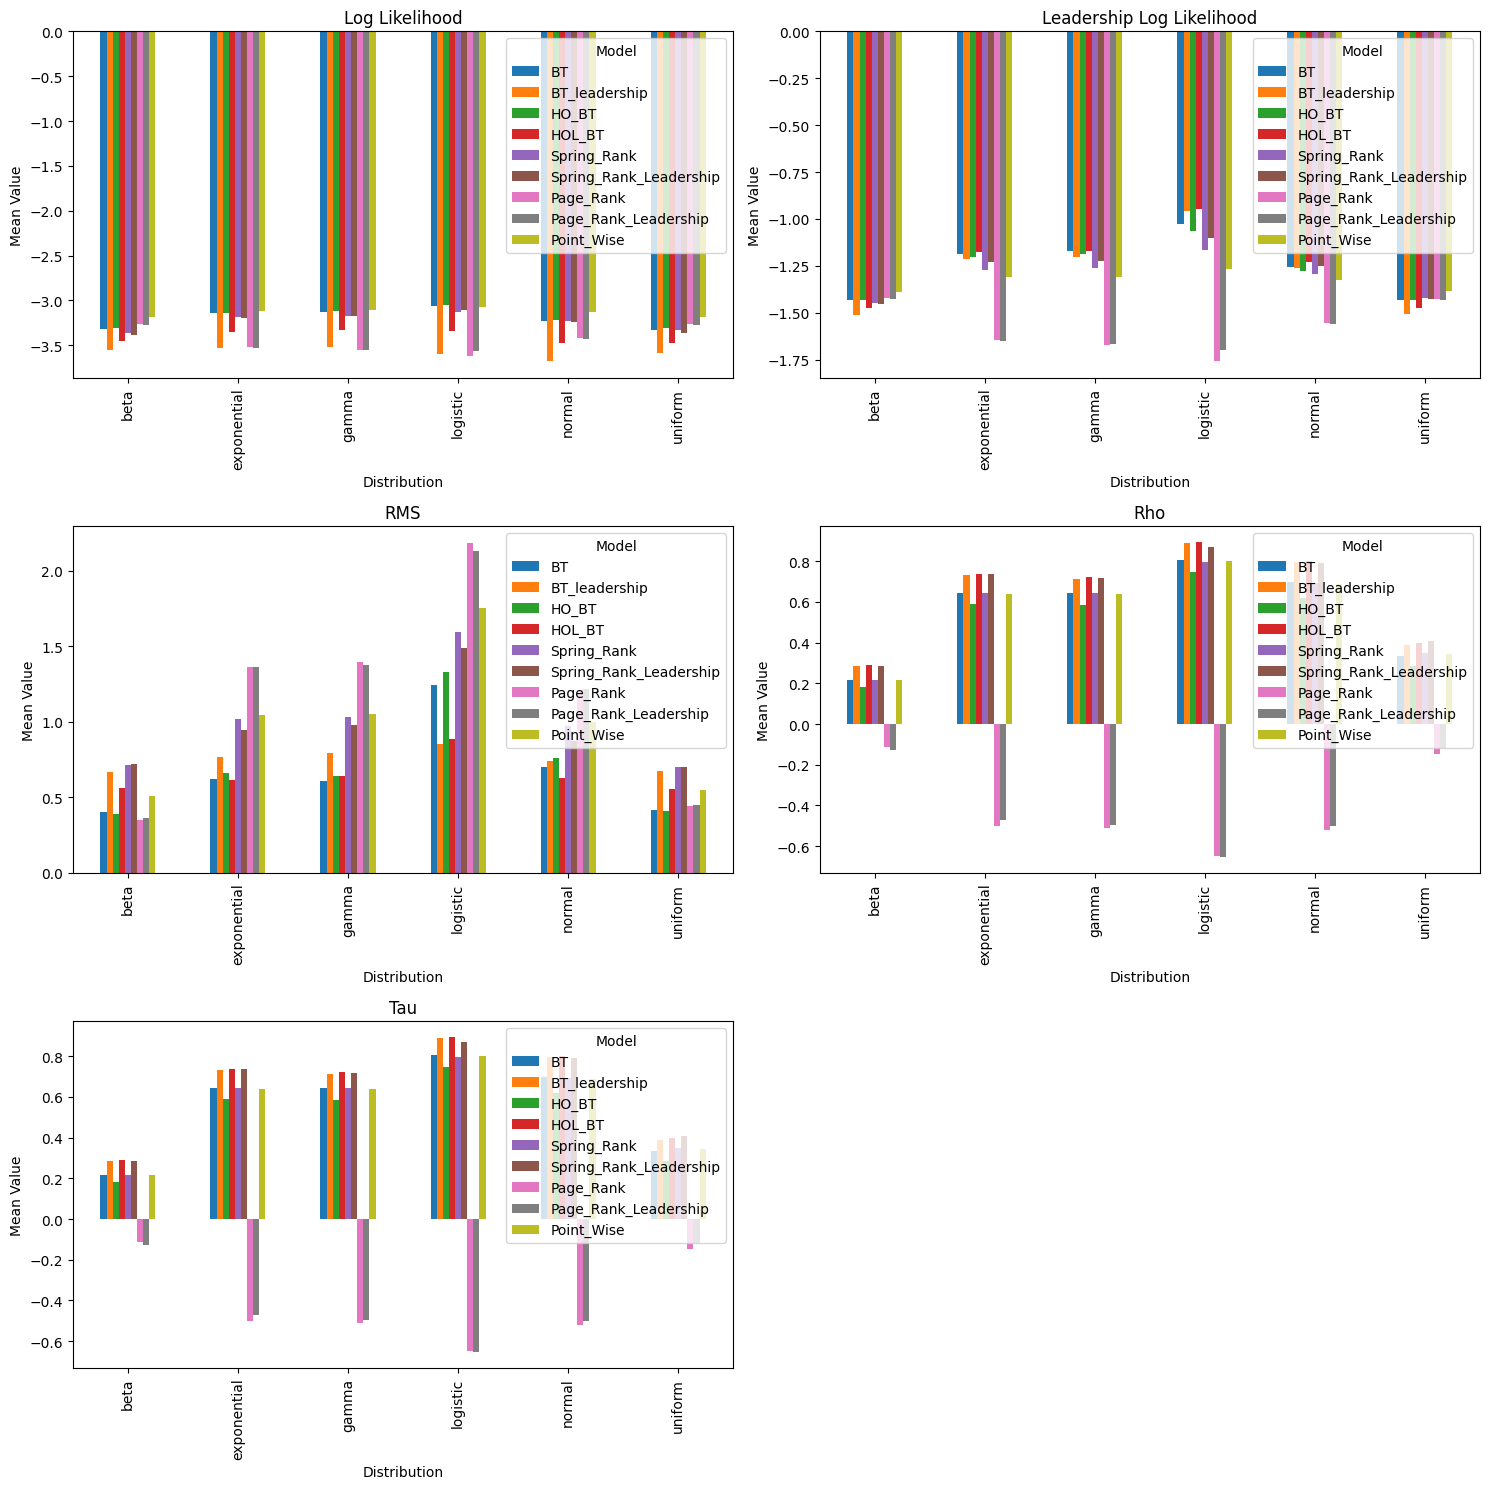

In [32]:
visualize_results(os.path.join(os.getcwd(), 'results', 'ex06.2'))